# Sprint 機械学習フロー

# CV(クロスバリデーション)

In [17]:
import numpy as np
import pandas as pd
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
sns.set()
%matplotlib inline

In [2]:
from sklearn.model_selection import KFold, StratifiedKFold, GridSearchCV

In [3]:
df = pd.read_csv('application_train.csv')

In [4]:
print(df.shape)

(307511, 122)


In [5]:
#KFold と StratifiedKFold の両方をやってみて、偏りを確認。
#偏りないなら KFold
#比率が怪しいなら StratifiedKFold

In [6]:
# Grid Search (Sklearn) だとCVも一気にやってくれる
'''
clf = GridSearchCV(estimator=RandomForestClassifier(),
                   param_grid=parameter_candidates,
                   cv=5,
                   refit=True,
                   error_score=0,
                   n_jobs=-1)
clf.fit(data_X, data_y)

cv_result = pd.DataFrame(clf.cv_results_) 
cv_result   # cv_results_ 属性で各パラメータごとの学習結果を確認できる
'''

'\nclf = GridSearchCV(estimator=RandomForestClassifier(),\n                   param_grid=parameter_candidates,\n                   cv=5,\n                   refit=True,\n                   error_score=0,\n                   n_jobs=-1)\nclf.fit(data_X, data_y)\n\ncv_result = pd.DataFrame(clf.cv_results_) \ncv_result   # cv_results_ 属性で各パラメータごとの学習結果を確認できる\n'

>→検証が終わったら、全トレーニングデータで再訓練して、その一つのモデルでテストデータの予測を作ります（標準的な手法）。

- CVは検証用のため、検証が終われば捨てる。

## 【問題1】クロスバリデーション

In [7]:
from sklearn.model_selection import KFold
kf = KFold(n_splits = 5)

In [6]:
kf.get_n_splits(df)
#print(kf)

5

In [11]:
#名義尺度を変数化
import category_encoders as ce

#エンコードしたい列を指定　# Eoncodeしたい列をリストで指定。もちろん複数指定可能。
#全て
list_cols = ['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','CNT_CHILDREN'
            ,'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','NAME_TYPE_SUITE','NAME_INCOME_TYPE'
            ,'NAME_EDUCATION_TYPE','OCCUPATION_TYPE','WEEKDAY_APPR_PROCESS_START','ORGANIZATION_TYPE'
            ,'FONDKAPREMONT_MODE','HOUSETYPE_MODE','WALLSMATERIAL_MODE','EMERGENCYSTATE_MODE']
# OneHotEncodeしたい列を指定。Nullや不明の場合の補完方法も指定。
ce_ohe = ce.OneHotEncoder(cols=list_cols,handle_unknown='impute')

# pd.DataFrameをそのまま突っ込む
df_gender_onehot = ce_ohe.fit_transform(df)

#display(df_gender_onehot)
for i in df_gender_onehot.columns:
    print(i, df_gender_onehot[i].isnull().sum(), sep = ":")

SK_ID_CURR:0
TARGET:0
NAME_CONTRACT_TYPE_1:0
NAME_CONTRACT_TYPE_2:0
CODE_GENDER_1:0
CODE_GENDER_2:0
CODE_GENDER_3:0
FLAG_OWN_CAR_1:0
FLAG_OWN_CAR_2:0
FLAG_OWN_REALTY_1:0
FLAG_OWN_REALTY_2:0
CNT_CHILDREN_1:0
CNT_CHILDREN_2:0
CNT_CHILDREN_3:0
CNT_CHILDREN_4:0
CNT_CHILDREN_5:0
CNT_CHILDREN_6:0
CNT_CHILDREN_7:0
CNT_CHILDREN_8:0
CNT_CHILDREN_9:0
CNT_CHILDREN_10:0
CNT_CHILDREN_11:0
CNT_CHILDREN_12:0
CNT_CHILDREN_13:0
CNT_CHILDREN_14:0
CNT_CHILDREN_15:0
AMT_INCOME_TOTAL:0
AMT_CREDIT:0
AMT_ANNUITY:12
AMT_GOODS_PRICE:278
NAME_TYPE_SUITE_1:0
NAME_TYPE_SUITE_2:0
NAME_TYPE_SUITE_3:0
NAME_TYPE_SUITE_4:0
NAME_TYPE_SUITE_5:0
NAME_TYPE_SUITE_6:0
NAME_TYPE_SUITE_7:0
NAME_TYPE_SUITE_8:0
NAME_INCOME_TYPE_1:0
NAME_INCOME_TYPE_2:0
NAME_INCOME_TYPE_3:0
NAME_INCOME_TYPE_4:0
NAME_INCOME_TYPE_5:0
NAME_INCOME_TYPE_6:0
NAME_INCOME_TYPE_7:0
NAME_INCOME_TYPE_8:0
NAME_EDUCATION_TYPE_1:0
NAME_EDUCATION_TYPE_2:0
NAME_EDUCATION_TYPE_3:0
NAME_EDUCATION_TYPE_4:0
NAME_EDUCATION_TYPE_5:0
NAME_FAMILY_STATUS_1:0
NAME_FAMILY

In [13]:
#欠損を全部０で埋める
df_gender_onehot_0df = df_gender_onehot.fillna(0)

#for i in df_gender
# df_onehot_0df.columns
    #print(i, df_gender_onehot_0df[i].isnull().sum(), sep = ":")
#display(df_gender_onehot_0df)


#TARGET の分離
#pd.set_option('display.max_columns',1000)
#display(df_mix.head(2)['WALLSMATERIAL_MODE_5'])
X_0df = df_gender_onehot_0df.drop("TARGET", axis = 1)
y_0df = df_gender_onehot_0df.loc[:,'TARGET']

In [14]:
#array化
X_0 = X_0df.as_matrix()
y_0 = y_0df.as_matrix()

/Users/akishimasaki/.pyenv/versions/anaconda3-2019.03/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/Users/akishimasaki/.pyenv/versions/anaconda3-2019.03/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [13]:
#クロスバリデーション
kf.get_n_splits(df_gender_onehot_0df)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

#from sklearn.metrics import precision_score
#from sklearn.metrics import recall_score
#from sklearn.metrics import f1_score

from sklearn.metrics import confusion_matrix

from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100, max_depth = 2, random_state = 0)
scores = cross_val_score(rf, X_0, y_0, cv=5)
print(scores)

[0.91927223 0.91927092 0.91927092 0.91927092 0.91927092]


In [54]:
for train_index, test_index in kf.split(X_0):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_0_train, X_0_test = X_0[train_index], X_0[test_index]
    y_0_train, y_0_test = y_0[train_index], y_0[test_index]
    
    rf.fit(X_0_train, y_0_train)
    
    X_0_fi = rf.feature_importances_
    y_0_pred = rf.predict(X_0_test)
    
    print(accuracy_score(y_0_test,y_0_pred))
    print(confusion_matrix(y_0_test,y_0_pred))

TRAIN: [ 61503  61504  61505 ... 307508 307509 307510] TEST: [    0     1     2 ... 61500 61501 61502]
0.9198738272929776
[[56575     0]
 [ 4928     0]]
TRAIN: [     0      1      2 ... 307508 307509 307510] TEST: [ 61503  61504  61505 ... 123002 123003 123004]
0.9172709830574616
[[56414     0]
 [ 5088     0]]
TRAIN: [     0      1      2 ... 307508 307509 307510] TEST: [123005 123006 123007 ... 184504 184505 184506]
0.9188969464407661
[[56514     0]
 [ 4988     0]]
TRAIN: [     0      1      2 ... 307508 307509 307510] TEST: [184507 184508 184509 ... 246006 246007 246008]
0.9197261877662515
[[56565     0]
 [ 4937     0]]
TRAIN: [     0      1      2 ... 246006 246007 246008] TEST: [246009 246010 246011 ... 307508 307509 307510]
0.9205879483594029
[[56618     0]
 [ 4884     0]]


In [ ]:
#KFoldを行った結果、複合行列の表から、上記の通りやはり上手く分けられなかった。

## 【問題2】グリッドサーチ

In [84]:
#グリッドサーチ
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

forest = RandomForestClassifier()
parameters = {'n_estimators':[1,50],'min_samples_leaf':[1,50]}

clf = GridSearchCV(forest, parameters,cv = 5, scoring = "roc_auc")
clf.fit(X_0_train, y_0_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [1, 50], 'min_samples_leaf': [1, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [86]:
print("test set score(AUC):{:.2f}".format(clf.score(X_0_test, y_0_test)))
print("Best parameters:{}".format(clf.best_params_))
print("Best cross-validation score :{:.2f}".format(clf.best_score_))

test set score(AUC):0.73
Best parameters:{'min_samples_leaf': 50, 'n_estimators': 50}
Best cross-validation score :0.73


In [95]:
clf = GridSearchCV(forest, parameters,cv = 10, scoring = "roc_auc")
clf.fit(X_0_train, y_0_train)
print("test set score(AUC):{:.2f}".format(clf.score(X_0_test, y_0_test)))
print("Best parameters:{}".format(clf.best_params_))
print("Best cross-validation score :{:.2f}".format(clf.best_score_))

test set score(AUC):0.73
Best parameters:{'min_samples_leaf': 50, 'n_estimators': 50}
Best cross-validation score :0.73


## 【問題3】Kernelからの調査
>KaggleのKernelから様々なアイデアを見つけ出して、列挙してください。

・xgboost(勾配ブースティング) -> that can handle missing values with no need for imputation.
*下手に欠損値をいじるよりもxgboostした方がいいこともある

## 【問題4】高い汎化性能のモデル作成
>問題3で見つけたアイデアと、独自のアイデアを組み合わせ高い汎化性能のモデル作りを進めてください。
その過程として、何を行うことで、クロスバリデーションの結果がどの程度変化したかを表にまとめてください。

In [14]:
from tqdm import tqdm
tqdm.pandas()

In [15]:
X_df = df_gender_onehot.drop("TARGET", axis = 1)
y_df = df_gender_onehot.loc[:,'TARGET']

X,y = X_df, y_df
X_trainx, X_testx, y_trainx, y_testx = train_test_split(X,y)

In [24]:
# light gbm
import lightgbm as lgb

X_df = df_gender_onehot.drop("TARGET", axis = 1)
y_df = df_gender_onehot.loc[:,'TARGET']

X,y = X_df, y_df
X_train, X_test, y_train, y_test = train_test_split(X,y)

lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)
model_lgb = lgb

In [21]:
lgbm_params = {'num_leaves':60}
lgbm_params['metric'] = 'auc'
model = lgb.train(lgbm_params, lgb_train, 
                  num_boost_round=74,
                  valid_sets = lgb_eval,early_stopping_rounds = 200)

y_pred = model.predict(X_test, num_iteration=model.best_iteration)

[1]	valid_0's auc: 0.714279
Training until validation scores don't improve for 200 rounds
[2]	valid_0's auc: 0.718616
[3]	valid_0's auc: 0.719961
[4]	valid_0's auc: 0.724121
[5]	valid_0's auc: 0.726335
[6]	valid_0's auc: 0.727655
[7]	valid_0's auc: 0.728307
[8]	valid_0's auc: 0.72972
[9]	valid_0's auc: 0.730718
[10]	valid_0's auc: 0.731763
[11]	valid_0's auc: 0.732545
[12]	valid_0's auc: 0.733694
[13]	valid_0's auc: 0.734281
[14]	valid_0's auc: 0.735311
[15]	valid_0's auc: 0.736637
[16]	valid_0's auc: 0.737262
[17]	valid_0's auc: 0.738148
[18]	valid_0's auc: 0.739111
[19]	valid_0's auc: 0.739785
[20]	valid_0's auc: 0.740546
[21]	valid_0's auc: 0.74194
[22]	valid_0's auc: 0.742716
[23]	valid_0's auc: 0.743503
[24]	valid_0's auc: 0.744264
[25]	valid_0's auc: 0.74473
[26]	valid_0's auc: 0.745391
[27]	valid_0's auc: 0.745759
[28]	valid_0's auc: 0.746134
[29]	valid_0's auc: 0.746519
[30]	valid_0's auc: 0.746902
[31]	valid_0's auc: 0.747716
[32]	valid_0's auc: 0.747802
[33]	valid_0's auc: 0.

In [26]:
y_pred

array([0.29683085, 0.04309893, 0.04688978, ..., 0.06298309, 0.13239623,
       0.0824656 ])

In [25]:
submission, fi, metrics = model_lgb(X_train, X_test)
print('Baseline metrics')
print(metrics)

<module 'lightgbm' from '/Users/akishimasaki/.pyenv/versions/anaconda3-2019.03/lib/python3.7/site-packages/lightgbm/__init__.py'>

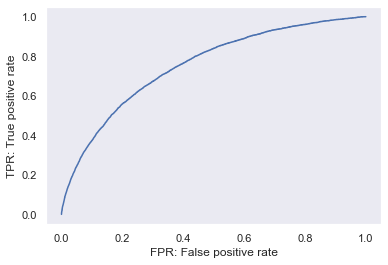

0.7539021138938808


In [22]:

#y_0_score = rf.score(X_0_test, y_0_test,sample_weight=None)

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.plot(fpr, tpr)
plt.xlabel('FPR: False positive rate')
plt.ylabel('TPR: True positive rate')
plt.grid()
plt.show()
print(roc_auc_score(y_test, y_pred))

In [ ]:
# future imortance をして効果の高いものをみる

In [ ]:
#結果を比較して、xgbとlightgbmでほぼ値が変わらなかった。

In [ ]:
#特徴量エンジニアリングとして、クラスター分析
#LightGBMは項目多い方がいい結果が出やすいので、項目を増やす方針で

'''
from scipy.cluster.hierarchy import linkage, dendrogram
result1 = linkage(df_gender_onehot.iloc[:,:],
                 metric = 'correlation',
                 method = 'average')
plt.figure(figsize=(8,8))
dendrogram(result1, orientation='right',labels=list(df_gender_onehot.index),
          color_threshold=0.0)
plt.title("Dendrogram")
plt.xlabel("Threshold")
plt.grid()
plt.show()
'''
#カーネル止まるので中止

## 【問題5】最終的なモデルの選定
>最終的にこれは良いというモデルを選び、推定した結果をKaggleに提出してスコアを確認してください。どういったアイデアを取り入れ、どの程度のスコアになったかを記載してください。

In [ ]:
#提出ファイルは pred_proba で確率を。
#スコアは0.71だった。

In [ ]:
def draw_dendro_classes(result):
    n_clusters = len(result)
    n_samples = len(result)
    df1 = pd.DataFrame(result)
    x1 = []
    y1 = []
    x2 = []
    y2 = []
    for i in range(len(result) - 1):
        n1 = int(result[i][0])
        n2 = int(result[i][1])
        val = result[i][2]
        n_clusters -= 1
        x1.append(val)
        x2.append(val)
        y1.append(n_clusters)
        y2.append(float(n_samples) / float(n_clusters))
        
    plt.subplot(2,1,1)
    plt.plot(x1,y1,'yo-')
    plt.title('Threshold dependency of hierarchical clustering')
    plt.ylabel('Num of clusters')
    plt.subplot(2,1,2)
    plt.plot(x2,y2,'ro-')
    plt.xlabel('Threshold')
    plt.ylabel('Ave cluster size')
    plt.show()

In [18]:
#パラメーターはカーネルからコピペ
xgb = XGBClassifier()
dtrain = xgb.DMatrix(X_trainx, label=y_trainx)
dtest = xgb.DMatrix(X_testx)

clf = XGBClassifier(learning_rate =0.01, n_estimators=10000, max_depth=4, min_child_weight=5, subsample=0.8, colsample_bytree=0.8, objective= 'binary:logistic', 
            nthread=4, scale_pos_weight=2.5, seed=27, reg_lambda = 1.2)

clf.fit(X_trainx, y_trainx, eval_set=[(X_trainx, y_trainx), (X_testx, y_testx)], 
                eval_metric= 'auc', verbose= 100, early_stopping_rounds= 200)

'''
xgb_params = {'seed': 0,
    'colsample_bytree': 0.7,
    'silent': 1,
    'subsample': 0.7,
    'learning_rate': 0.075,
    'objective': 'binary:logistic',
    'max_depth': 4,
    'num_parallel_tree': 1,
    'min_child_weight': 1,
    'nrounds': 200}

bst = xgb.train(xgb_params,
                dtrain,
                )

y_pred_proba = bst.predict(dtest)
print(y_pred_proba)

#y_pred = bst.predict(X_test)
'''

AttributeError: 'XGBClassifier' object has no attribute 'DMatrix'

In [12]:
y_predx = clf.predict_proba(X_testx)[:, 1]
print(np.unique((y_predx > 0.5).astype(int)))
print(y_predx)

NameError: name 'clf' is not defined

In [19]:
#y_0_score = rf.score(X_0_test, y_0_test,sample_weight=None)

fpr, tpr, thresholds = roc_curve(y_testx, y_predx)

plt.plot(fpr, tpr)
plt.xlabel('FPR: False positive rate')
plt.ylabel('TPR: True positive rate')
plt.grid()

print("test set score(AUC):{:.2f}".format(clf.score(X_testx, y_testx)))
print("Best parameters:{}".format(clf.best_params_))
print("Best cross-validation score :{:.2f}".format(clf.best_score_))
print(roc_auc_score(y_testx, y_predx))
#print(confusion_matrix(y_test,y_pred_proba))
#print(y_predx)

NameError: name 'y_predx' is not defined

In [87]:
'''
#xgboostのパラメータをグリッドサーチで決定する
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA, NMF
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import GridSearchCV

pipeline = Pipeline([
    ('clf', XGBRegressor()),
])

params = dict(clf__n_estimators=(10, 20, 30),
              clf__learning_rate=(.1, .2, .3), 
              clf__max_depth=(2, 3, 4, 5),
              clf__min_child_weight=(.5, .75, 1.0))

grid_search = GridSearchCV(pipeline, param_grid=params).fit(X_train, y_train)
predictions = grid_search.predict(X_test)
'''

"\n#xgboostのパラメータをグリッドサーチで決定する\nfrom xgboost import XGBRegressor\nfrom sklearn.pipeline import Pipeline\nfrom sklearn.decomposition import PCA, NMF\nfrom sklearn.preprocessing import PolynomialFeatures\nfrom sklearn.feature_selection import SelectKBest, chi2\nfrom sklearn.model_selection import GridSearchCV\n\npipeline = Pipeline([\n    ('clf', XGBRegressor()),\n])\n\nparams = dict(clf__n_estimators=(10, 20, 30),\n              clf__learning_rate=(.1, .2, .3), \n              clf__max_depth=(2, 3, 4, 5),\n              clf__min_child_weight=(.5, .75, 1.0))\n\ngrid_search = GridSearchCV(pipeline, param_grid=params).fit(X_train, y_train)\npredictions = grid_search.predict(X_test)\n"